In [1]:
import pandas as pd
import os 
import numpy as np 

In [2]:
owid = pd.read_csv('../Data/owid-covid-data.csv')
singapore_testing = owid[owid['location']=='Singapore']
singapore_testing = singapore_testing[~singapore_testing['total_tests'].isna()][['date',
                                                                                 'total_tests',
                                                                                 'new_tests',
                                                                                 'positive_rate',
                                                                                 'tests_per_case']]

In [3]:
singapore_testing['test_done_in_week'] = singapore_testing['total_tests'].diff()
singapore_testing['average_test_daily'] = singapore_testing['test_done_in_week']/7.0

In [4]:
daily_dt_range = pd.date_range(start=singapore_testing['date'].iloc[0], end=singapore_testing['date'].iloc[-1])

In [5]:
singapore_testing_daily = singapore_testing.set_index('date')
singapore_testing_daily.index = pd.to_datetime(singapore_testing_daily.index)
singapore_testing_daily = singapore_testing_daily.reindex(daily_dt_range)

In [6]:
singapore_testing_daily['average_test_daily'] = singapore_testing_daily['average_test_daily'].bfill()

In [7]:
singapore_testing_daily = singapore_testing_daily.reset_index()
singapore_testing_daily = singapore_testing_daily.rename({'index':'Date'},axis=1)

In [8]:
singapore_testing_daily

,Date,total_tests,new_tests,positive_rate,tests_per_case,test_done_in_week,average_test_daily
0,2020-04-07,72680.0,NaN,NaN,NaN,NaN,3159.428571
1,2020-04-08,NaN,NaN,NaN,NaN,NaN,3159.428571
2,2020-04-09,NaN,NaN,NaN,NaN,NaN,3159.428571
3,2020-04-10,NaN,NaN,NaN,NaN,NaN,3159.428571
4,2020-04-11,NaN,NaN,NaN,NaN,NaN,3159.428571
...,...,...,...,...,...,...,...
429,2021-06-10,NaN,NaN,NaN,NaN,NaN,63179.142857
430,2021-06-11,NaN,NaN,NaN,NaN,NaN,63179.142857
431,2021-06-12,NaN,NaN,NaN,NaN,NaN,63179.142857
432,2021-06-13,NaN,NaN,NaN,NaN,NaN,63179.142857


Load Eugene Data - Test

In [24]:
swab_fig_present = pd.read_csv('../covid19-modelling-sg/data/statistics/swab_figures.csv')
owid = pd.read_csv('../Data/owid-covid-data.csv')
singapore_test = owid[owid['location']=='Singapore']

In [25]:
singapore_test = singapore_test[['date','positive_rate',
                'total_tests',
                'new_tests',
                'new_cases',
                'tests_per_case']]

singapore_test['date'] = pd.to_datetime(singapore_test['date'])

- OWID: 2020-04-14 -> 2021-06-14
- Eugene: 2020-09-28 -> (2021-07-19) Today
- Earliest Date -> 2020-01-23

In [26]:
swab_fig_present['date'] = pd.to_datetime(swab_fig_present['date'])
swab_fig_present = swab_fig_present.groupby('date', as_index=False).first()

In [27]:
swab_fig_present.head()

,date,total_swabs_tested,average_daily_number_of_swabs_tested_over_the_past_week_approx,total_swabs_per_1m_total_population_approx
0,2020-09-28,2885545,27600,506200
1,2020-10-05,3072368,26700,539000
2,2020-10-12,3290291,31100,577200
3,2020-10-19,3486260,28000,611600
4,2020-10-26,3680000,27700,645600


Transform Eugene covid data to daily

In [39]:
daily_dt_range_2 = pd.date_range(start=swab_fig_present['date'].iloc[0],
                               end=swab_fig_present['date'].iloc[-1])

swab_fig_present_daily = swab_fig_present.set_index('date')
swab_fig_present_daily.index = pd.to_datetime(swab_fig_present_daily.index)
swab_fig_present_daily = swab_fig_present_daily.reindex(daily_dt_range_2)

swab_fig_present_daily['average_daily_number_of_swabs_tested_over_the_past_week_approx'] = \
    swab_fig_present_daily['average_daily_number_of_swabs_tested_over_the_past_week_approx'].bfill()

In [40]:
swab_fig_present_daily = swab_fig_present_daily.reset_index()
swab_fig_present_daily = swab_fig_present_daily.rename({'index':'Date'},axis=1)

In [42]:
swab_fig_present_daily

,Date,total_swabs_tested,average_daily_number_of_swabs_tested_over_the_past_week_approx,total_swabs_per_1m_total_population_approx
0,2020-09-28,2885545.0,27600.0,506200.0
1,2020-09-29,NaN,26700.0,NaN
2,2020-09-30,NaN,26700.0,NaN
3,2020-10-01,NaN,26700.0,NaN
4,2020-10-02,NaN,26700.0,NaN
...,...,...,...,...
290,2021-07-15,NaN,71100.0,NaN
291,2021-07-16,NaN,71100.0,NaN
292,2021-07-17,NaN,71100.0,NaN
293,2021-07-18,NaN,71100.0,NaN


#### Combine OWID and Eugene Data

In [47]:
combine_owid_eug = singapore_testing_daily.merge(swab_fig_present_daily,
                                                 on='Date',
                                                 how='outer')

In [63]:
import math
comb_daily_test = []
for v1,v2 in zip(combine_owid_eug['average_test_daily'],combine_owid_eug['average_daily_number_of_swabs_tested_over_the_past_week_approx']):
    if v1 and math.isnan(v2):
        val = v1
    elif v2 and math.isnan(v1):
        val = v2
    else:
        val = 0.5*(v1+v2)
    comb_daily_test.append(val)

combine_owid_eug['Combined_Daily_Test'] = comb_daily_test

In [65]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

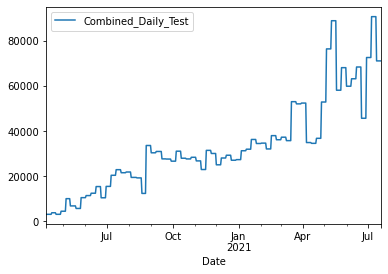

In [66]:
combine_owid_eug.plot(x='Date',y='Combined_Daily_Test')

Load Eugene Data - Case Counts

In [72]:
case_counts = pd.read_csv('../covid19-modelling-sg/data/statistics/epidemic_curve.csv')
case_counts = case_counts.rename(columns={'Unnamed: 0':'Date'})
case_counts['Date'] = pd.to_datetime(case_counts['Date'])
case_counts['total_cases'] = case_counts['Community Total Cases'] + case_counts['Dormitory Residents Total Cases']

Merge Together

In [92]:
test_positivity_frame = case_counts[['Date','total_cases']].merge(combine_owid_eug[['Date','Combined_Daily_Test']],
                                         how='left',
                                         on='Date')

Forward Fill New Days

In [93]:
test_positivity_frame['Combined_Daily_Test'] = test_positivity_frame['Combined_Daily_Test'].ffill()

For Days, interpolate to 100 Tests Daily
- 2020-04-07 (First date with data)

In [94]:
start_val = 100
test_positivity_frame.loc[0,'Combined_Daily_Test'] = start_val

In [96]:
test_positivity_frame['Combined_Daily_Test'] = test_positivity_frame['Combined_Daily_Test'].interpolate()

In [100]:
test_positivity_frame['Positivity_Rate'] = test_positivity_frame['total_cases']/test_positivity_frame['Combined_Daily_Test']

<AxesSubplot:xlabel='Date'>

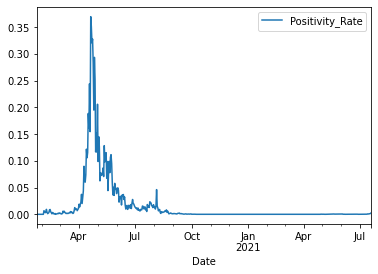

In [103]:
test_positivity_frame.plot(x='Date',y='Positivity_Rate')

<AxesSubplot:xlabel='Date'>

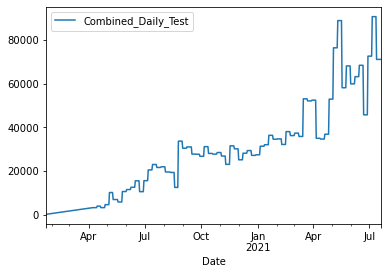

In [104]:
test_positivity_frame.plot(x='Date',y='Combined_Daily_Test')

# Qurantine Rate

In [243]:
case_counts = pd.read_csv('../covid19-modelling-sg/data/statistics/epidemic_curve.csv')
case_counts = case_counts.rename(columns={'Unnamed: 0':'Date'})
case_counts['Date'] = pd.to_datetime(case_counts['Date'])

start_date = case_counts['Date'].iloc[0]
end_date = case_counts['Date'].iloc[-1]

In [244]:
active_quarantine = pd.read_csv('../covid19-modelling-sg/data/statistics/active_number_under_quarantine.csv')
active_quarantine = active_quarantine.rename(columns={'Unnamed: 0':'Date'})
active_quarantine['Date'] = pd.to_datetime(active_quarantine['Date'])


shn =  pd.read_csv('../covid19-modelling-sg/data/statistics/individuals_under_shn.csv')
shn = shn.rename(columns={'Unnamed: 0':'Date'})
shn['Date'] = pd.to_datetime(shn['Date'])

Process Qurantine Info

In [245]:
active_quarantine

,Date,Persons under quarantine in Home Quarantine Order,Persons under quarantine in Government Quarantine Facility,Persons under quarantine in situ,Persons under quarantine being transferred to hospital,Persons under quarantine in process,Persons under quarantine pending decant,Persons under quarantine out of country
0,2020-04-01,4145.0,510.0,NaN,148.0,NaN,NaN,NaN
1,2020-04-02,4289.0,870.0,NaN,102.0,NaN,NaN,NaN
2,2020-04-03,3992.0,900.0,NaN,115.0,NaN,NaN,NaN
3,2020-04-04,4118.0,1719.0,NaN,147.0,NaN,NaN,NaN
4,2020-04-05,4045.0,1792.0,NaN,158.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
471,2021-07-16,169.0,2664.0,5.0,1.0,2465.0,0.0,1321.0
472,2021-07-17,172.0,3621.0,5.0,1.0,2908.0,1.0,1189.0
473,2021-07-18,236.0,4589.0,6.0,1.0,3685.0,1.0,973.0
474,2021-07-19,297.0,5062.0,11.0,1.0,4524.0,0.0,889.0


In [246]:
active_quarantine['Total_under_quarantine'] = active_quarantine['Persons under quarantine in Home Quarantine Order'] + \
                                            active_quarantine['Persons under quarantine in Home Quarantine Order'] +\
                                            active_quarantine['Persons under quarantine in situ'].fillna(0) 
                                            

In [247]:
combined_notices = shn.merge(active_quarantine[['Date','Total_under_quarantine']], on='Date', how='outer')

In [248]:
combined_notices = combined_notices.ffill()

In [249]:
combined_notices = combined_notices.set_index("Date")
daily_dt_range = pd.date_range(start=start_date, end=end_date)
combined_notices = combined_notices.reindex(daily_dt_range)
combined_notices.reset_index(inplace=True)
combined_notices = combined_notices.rename(columns={'index':'Date'})

In [250]:
combined_notices['SHN'] = combined_notices['Individuals in Stay Home Notices (Hotel)'] + \
                          combined_notices['Individuals in Stay Home Notices (Home)'] 


In [251]:
test_positivity_frame.loc[0,'Combined_Daily_Test'] = start_val
test_positivity_frame['Combined_Daily_Test'] = test_positivity_frame['Combined_Daily_Test'].interpolate()

In [252]:
shn_start_val = 0
quarantine_start_val = 0

combined_notices.loc[0,'SHN'] = shn_start_val
combined_notices.loc[0,'Total_under_quarantine'] = quarantine_start_val

combined_notices['SHN'] = combined_notices['SHN'].interpolate()
combined_notices['Total_under_quarantine'] = combined_notices['Total_under_quarantine'].interpolate()

In [254]:
combined_notices['Total_in_iso'] = combined_notices['Total_under_quarantine'] + \
                                   combined_notices['SHN']

In [256]:
combined_notices

,Date,Individuals in Stay Home Notices (Hotel),Individuals in Stay Home Notices (Home),Total_under_quarantine,SHN,Total_in_iso
0,2020-01-23,NaN,NaN,0.000000,0.000000,0.000000
1,2020-01-24,NaN,NaN,120.144928,9.148148,129.293076
2,2020-01-25,NaN,NaN,240.289855,18.296296,258.586151
3,2020-01-26,NaN,NaN,360.434783,27.444444,387.879227
4,2020-01-27,NaN,NaN,480.579710,36.592593,517.172303
...,...,...,...,...,...,...
540,2021-07-16,7702.0,1263.0,343.000000,8965.000000,9308.000000
541,2021-07-17,7735.0,1317.0,349.000000,9052.000000,9401.000000
542,2021-07-18,7813.0,1323.0,478.000000,9136.000000,9614.000000
543,2021-07-19,7670.0,1340.0,605.000000,9010.000000,9615.000000


## Testing Functions


In [292]:
def import_owid_test_counts(owid_data_path):
    """ Combines OWID data and repository data and outputs a dataframe with columns Data, test_positivity rate and daily number tests
    """

    #### Process OWID Data ####
    owid = pd.read_csv(owid_data_path)
    singapore_testing = owid[owid['location']=='Singapore']
    singapore_testing = singapore_testing[~singapore_testing['total_tests'].isna()][['date',
                                                                                 'total_tests',
                                                                                 'new_tests',
                                                                                 'positive_rate',
                                                                                 'tests_per_case']]
    singapore_testing['test_done_in_week'] = singapore_testing['total_tests'].diff()
    singapore_testing['average_test_daily'] = singapore_testing['test_done_in_week']/7.0
    daily_dt_range = pd.date_range(start=singapore_testing['date'].iloc[0], end=singapore_testing['date'].iloc[-1])

    singapore_testing_daily = singapore_testing.set_index('date')
    singapore_testing_daily.index = pd.to_datetime(singapore_testing_daily.index)
    singapore_testing_daily = singapore_testing_daily.reindex(daily_dt_range)

    singapore_testing_daily['average_test_daily'] = singapore_testing_daily['average_test_daily'].bfill()
    singapore_testing_daily = singapore_testing_daily.reset_index()
    singapore_testing_daily = singapore_testing_daily.rename({'index':'Date'},axis=1)

    return singapore_testing_daily

def import_repo_test_counts(repo_data_path):
    swab_fig_present = pd.read_csv(repo_data_path)
    swab_fig_present = swab_fig_present.rename(columns={'Unnamed: 0':'date'})
    swab_fig_present['date'] = pd.to_datetime(swab_fig_present['date'])
    swab_fig_present = swab_fig_present.groupby('date', as_index=False).first()

    daily_dt_range_2 = pd.date_range(start=swab_fig_present['date'].iloc[0],
                                end=swab_fig_present['date'].iloc[-1])

    swab_fig_present_daily = swab_fig_present.set_index('date')
    swab_fig_present_daily.index = pd.to_datetime(swab_fig_present_daily.index)
    swab_fig_present_daily = swab_fig_present_daily.reindex(daily_dt_range_2)

    swab_fig_present_daily['average_daily_number_of_swabs_tested_over_the_past_week_approx'] = \
        swab_fig_present_daily['average_daily_number_of_swabs_tested_over_the_past_week_approx'].bfill()

    swab_fig_present_daily = swab_fig_present_daily.reset_index()
    swab_fig_present_daily = swab_fig_present_daily.rename({'index':'Date'},axis=1)

    return swab_fig_present_daily

def get_comb_test_counts(owid_data_path, repo_data_path):
    
    owid_test_counts = import_owid_test_counts(owid_data_path)
    repo_test_counts = import_repo_test_counts(repo_data_path)

    combine_owid_repo = owid_test_counts.merge(repo_test_counts,
                                                 on='Date',
                                                 how='outer')

    # Get combined tests
    comb_daily_test = []
    for v1,v2 in zip(combine_owid_repo['average_test_daily'],combine_owid_repo['average_daily_number_of_swabs_tested_over_the_past_week_approx']):
        if v1 and math.isnan(v2):
            val = v1
        elif v2 and math.isnan(v1):
            val = v2
        else:
            val = 0.5*(v1+v2)
        comb_daily_test.append(val)

    combine_owid_repo['Combined_Daily_Test'] = comb_daily_test

    return combine_owid_repo

def get_test_positivity_rate_raw(owid_data_path, repo_data_path, case_counts_path, start_val=100):

    test_counts = get_comb_test_counts(owid_data_path, repo_data_path)

    # Get case counts
    case_counts = pd.read_csv(case_counts_path)
    case_counts = case_counts.rename(columns={'Unnamed: 0':'Date'})
    case_counts['Date'] = pd.to_datetime(case_counts['Date'])
    case_counts['total_cases'] = case_counts['Community Total Cases'] + case_counts['Dormitory Residents Total Cases']

    test_positivity_frame = case_counts[['Date','total_cases']].merge(test_counts[['Date','Combined_Daily_Test']],
                                         how='left',
                                         on='Date')

    # Forward fill any missing days
    test_positivity_frame['Combined_Daily_Test'] = test_positivity_frame['Combined_Daily_Test'].ffill()

    # Backfill
    test_positivity_frame.loc[0,'Combined_Daily_Test'] = start_val
    test_positivity_frame['Combined_Daily_Test'] = test_positivity_frame['Combined_Daily_Test'].interpolate()
    test_positivity_frame['Positivity_Rate'] = test_positivity_frame['total_cases']/test_positivity_frame['Combined_Daily_Test']

    return test_positivity_frame

def get_test_positivity_data_model(owid_data_path, repo_data_path,
                                  case_counts_path, start_id,
                                  end_date, prediction_t=7, start_val=100, scale=True,
                                  extrapolate_type='ma'):
    # Only returns the number of tests conducted daily
    train_test_positivity = get_test_positivity_rate_raw(owid_data_path, repo_data_path, case_counts_path, start_val=start_val)
    test_counts = train_test_positivity['Combined_Daily_Test'].values
    test_counts = test_counts[start_id: start_id+end_date]

    if scale:
        mm_scaler = MinMaxScaler()
        test_counts = mm_scaler.fit_transform(test_counts.reshape(-1,1))
        test_counts = test_counts.reshape(-1)
    
    if prediction_t > 0:
        if extrapolate_type == 'last':
            test_counts_pad = [test_counts[-1] for x in range(prediction_t)]

        elif extrapolate_type == 'ma':
            print('imported cases ma')
            ma_week = np.mean(test_counts[-7::])
            test_counts_pad = [ma_week for x in range(prediction_t)]

        test_counts = np.concatenate([test_counts, test_counts_pad])

    return test_counts

def import_shn_data(shn_data_path):
    shn =  pd.read_csv(shn_data_path)
    shn = shn.rename(columns={'Unnamed: 0':'Date'})
    shn['Date'] = pd.to_datetime(shn['Date'])

    return shn

def import_quarantine_data(quarantine_data_path):
    """ Combines OWID data nad resposity data and outputs a dataframe with Data, number in quarantine, SHN and total isolated (quarantine+SHN)
    """
    active_quarantine = pd.read_csv(quarantine_data_path)
    active_quarantine = active_quarantine.rename(columns={'Unnamed: 0':'Date'})
    active_quarantine['Date'] = pd.to_datetime(active_quarantine['Date'])

    active_quarantine['Total_under_quarantine'] = active_quarantine['Persons under quarantine in Home Quarantine Order'] + \
                                                active_quarantine['Persons under quarantine in Home Quarantine Order'] +\
                                                active_quarantine['Persons under quarantine in situ'].fillna(0) 
                                                
    return active_quarantine

def get_isolation_data_raw(shn_data_path, quarantine_data_path, case_counts_path, shn_start_val=0, quarantine_start_val=0):

    shn = import_shn_data(shn_data_path)
    active_quarantine = import_quarantine_data(quarantine_data_path)

    case_counts = pd.read_csv(case_counts_path)
    case_counts = case_counts.rename(columns={'Unnamed: 0':'Date'})
    case_counts['Date'] = pd.to_datetime(case_counts['Date'])

    start_date = case_counts['Date'].iloc[0]
    end_date = case_counts['Date'].iloc[-1]

    combined_notices = shn.merge(active_quarantine[['Date',
                            'Total_under_quarantine']],
                             on='Date',
                             how='outer')
    
    combined_notices = combined_notices.ffill()

    # Expand date range to match the case count data frame
    combined_notices = combined_notices.set_index("Date")
    daily_dt_range = pd.date_range(start=start_date, end=end_date)
    combined_notices = combined_notices.reindex(daily_dt_range)
    combined_notices.reset_index(inplace=True)
    combined_notices = combined_notices.rename(columns={'index':'Date'})

    # Combine SHN numbers
    combined_notices['SHN'] = combined_notices['Individuals in Stay Home Notices (Hotel)'] + \
                            combined_notices['Individuals in Stay Home Notices (Home)'] 

    # Interpolate the missing back values
    combined_notices.loc[0,'SHN'] = shn_start_val
    combined_notices.loc[0,'Total_under_quarantine'] = quarantine_start_val

    combined_notices['SHN'] = combined_notices['SHN'].interpolate()
    combined_notices['Total_under_quarantine'] = combined_notices['Total_under_quarantine'].interpolate()

    # Since we are interested in total number of people in isolation
    combined_notices['Total_in_iso'] = combined_notices['Total_under_quarantine'] + \
                                    combined_notices['SHN']
    
    return combined_notices

def get_isolation_data_model(shn_data_path, quarantine_data_path,
                             case_counts_path, start_id, end_date,
                             shn_start_val=0, prediction_t=7,
                             quarantine_start_val=0, scale=True,extrapolate_type='ma'):

    isolation_data = get_isolation_data_raw(shn_data_path, quarantine_data_path,
                                            case_counts_path, shn_start_val=shn_start_val,
                                            quarantine_start_val=quarantine_start_val)

    isolation_counts = isolation_data['Total_in_iso'].values
    isolation_counts = isolation_counts[start_id: start_id+end_date]

    if scale:
        mm_scaler = MinMaxScaler()
        isolation_counts = mm_scaler.fit_transform(isolation_counts.reshape(-1,1))
        isolation_counts = isolation_counts.reshape(-1)
    
    if prediction_t > 0:
        if extrapolate_type == 'last':
            isolation_counts_pad = [isolation_counts[-1] for x in range(prediction_t)]

        elif extrapolate_type == 'ma':
            print('imported cases ma')
            ma_week = np.mean(isolation_counts[-7::])
            isolation_counts_pad = [ma_week for x in range(prediction_t)]

        isolation_counts = np.concatenate([isolation_counts, isolation_counts_pad])

    return isolation_counts

In [293]:
import math
from sklearn.preprocessing import MinMaxScaler

In [294]:
owid_data_path = '../Data/owid-covid-data.csv'
repo_data_path = '../covid19-modelling-sg/data/statistics/swab_figures.csv'
case_counts_path = '../covid19-modelling-sg/data/statistics/epidemic_curve.csv'
start_id = 50
end_date = 495

In [301]:
check1 = get_isolation_data_model(shn_data_path, quarantine_data_path,
                             case_counts_path, start_id, end_date,
                             shn_start_val=0, prediction_t=321,
                             quarantine_start_val=0, scale=True,extrapolate_type='ma')

imported cases ma


In [302]:
check2 = get_test_positivity_data_model(owid_data_path, repo_data_path,
                                  case_counts_path, start_id,
                                  end_date, prediction_t=321, start_val=100, scale=True,
                                  extrapolate_type='ma')

imported cases ma


In [259]:
case_counts_path = '../covid19-modelling-sg/data/statistics/epidemic_curve.csv'
shn_data_path = '../covid19-modelling-sg/data/statistics/individuals_under_shn.csv'
quarantine_data_path = '../covid19-modelling-sg/data/statistics/active_number_under_quarantine.csv'

In [261]:
testers = get_isolation_data(shn_data_path,
                   quarantine_data_path,
                   case_counts_path)


In [308]:
def import_case_data_v1(data_path, start_id):
    """ Import all case data

    Args:
        data_path ([str]): file path to the data
        start_id ([int]): start_id of the data

    Returns:
        [local_cases]: array of local cases
        [import_cases]: array of imported cases
        [len_observed]: length of local cases
    """

    data = pd.read_csv(data_path)
    data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
    data = data.sort_values('Date')

    new_cases = data['Daily Confirmed '].values
    len_observed = len(new_cases)

    local_cases = data['Daily Local transmission'].values[start_id:]
    imported_cases = data['Daily Imported'].values[start_id:]
    len_observed = len(local_cases)
    
    return local_cases, imported_cases, len_observed
    #print(len_observed)


def import_case_data(data_path, start_id, separate_dorms=True):
    """ Import case data

    Args:
        data_path (str): file path to data from git repo
        start_id (int): first date -> normally chosen to be 50 cumulative cases
        separate_dorms (bool, optional): Whether to separate community and dorm. Defaults to True.

    Returns:
        [community_cases]: array of community cases
        [dorm_cases]: array of dorm cases
        [total_cases]: array of sum of community and dorm cases
        [import_cases]: array of imported cases
        [len_observed]: length of local cases
    """
    data = pd.read_csv(data_path)
    data = data.rename(columns={'Unnamed: 0':'Date'})
    data['total_cases'] = data['Community Total Cases'] + data['Dormitory Residents Total Cases']
    data['Date'] = pd.to_datetime(data['Date'])

    community_cases = data['Community Total Cases'].values[start_id:]
    dorm_cases = data['Dormitory Residents Total Cases'].values[start_id:]
    total_cases = data['total_cases'].values[start_id:]
    imported_cases = data['Imported Cases'].values[start_id:]

    len_observed = len(community_cases)

    if separate_dorms:
        return community_cases, dorm_cases, imported_cases, total_cases, len_observed
    
    else:
        return total_cases, imported_cases, len_observed



def import_NPIS_v1(data_path, start_id):
    """ Gets the NPIs for the total period

    Args:
        data_path (str): filepath to the NPIs data storage
        start_id (int): start date

    Returns:
        NPIS_wanted: dataframe of NPIs
    """
    NPIS_proc = pd.read_csv(data_path)
    NPIS_wanted = NPIS_proc.iloc[start_id:, 2::]
    dates = pd.to_datetime(NPIS_proc['Date'])

    return NPIS_wanted

def import_NPIS(data_path, start_id):
    """ Gets the NPIs for the total period

    Args:
        data_path (str): filepath to the NPIs data storage
        start_id (int): start date

    Returns:
        NPIS_wanted: dataframe of NPIs
    """

    NPIS_proc = pd.read_csv(data_path)
    if 'Unnamed: 0' in NPIS_proc.columns:
        NPIS_proc = NPIS_proc.drop('Unnamed: 0', axis=1)
    NPIS_wanted = NPIS_proc.iloc[start_id:, 1::]
    dates = pd.to_datetime(NPIS_proc['Date'])

    return NPIS_wanted, dates



def generate_prediction_data_v1(cases_data_path, start_id,
                             end_date, prediction_t, imported_case_extra='last'):
    local_cases, imported_cases, _ = import_case_data_v1(cases_data_path, start_id)
    
    train_local_cases = local_cases[0:end_date]
    train_imported_cases = imported_cases[0:end_date]

    #actual = local_cases[end_date:end_date+prediction_t]

    train_pad = [np.nan for x in range(prediction_t)]

    if imported_case_extra == 'last':
        imported_pad = [train_imported_cases[-1] for x in range(prediction_t)]

    elif imported_case_extra == 'ma':
        print('imported cases ma')
        ma_week = np.round(np.mean(train_imported_cases[-7::]))
        imported_pad = [ma_week for x in range(prediction_t)]
    else:
        imported_pad = imported_case_extra

    model_input = pd.Series(np.concatenate([train_local_cases, train_pad]))
    imported_input = np.concatenate([train_imported_cases, imported_pad])

    print("Length training cases: ", len(train_local_cases))
    print("Length into model: ", len(model_input)," ",len(imported_input))

    len_observed = len(model_input)

    return model_input, imported_input, len_observed


def generate_prediction_data(cases_data_path, start_id,
                             end_date, prediction_t,
                             imported_case_extra='last',
                             separate_dorms=True,
                             separate_quarantine=False,
                             local_cases_breakdown_data_path=None):
    if separate_dorms and (not separate_quarantine):
        local_cases, dorm_cases, imported_cases, total_cases, _ = import_case_data(cases_data_path,
                                                          start_id,
                                                          separate_dorms=True)
        
        train_local_cases = local_cases[0:end_date]
        train_dorm_cases = dorm_cases[0:end_date]
        train_imported_cases = imported_cases[0:end_date]
        train_total_cases = total_cases[0:end_date]

        #actual = local_cases[end_date:end_date+prediction_t]

        train_pad = [np.nan for x in range(prediction_t)]

        if imported_case_extra == 'last':
            imported_pad = [train_imported_cases[-1] for x in range(prediction_t)]

        elif imported_case_extra == 'ma':
            print('imported cases ma')
            ma_week = np.round(np.mean(train_imported_cases[-7::]))
            imported_pad = [ma_week for x in range(prediction_t)]
        else:
            imported_pad = imported_case_extra

        local_model_input = pd.Series(np.concatenate([train_local_cases, train_pad]))
        dorm_model_input = pd.Series(np.concatenate([train_dorm_cases, train_pad]))
        imported_input = np.concatenate([train_imported_cases, imported_pad])
        total_input = np.concatenate([train_total_cases, train_pad])

        print("Length Community training cases: ", len(train_local_cases))
        print("Length Dorm training cases: ", len(train_dorm_cases))
        print("Length into model: ",
              len(local_model_input)," ",
              len(dorm_model_input)," ",
              len(imported_input))

        len_observed = len(local_model_input)

        return local_model_input, dorm_model_input, imported_input, total_input, len_observed

    elif separate_quarantine:

        if not local_cases_breakdown_data_path:
            raise ValueError("Must have path for case quarantine breakdown data if separate quaratine is true")

        _, dorm_cases, imported_cases, total_cases, _ = import_case_data(cases_data_path,
                                                          start_id,
                                                          separate_dorms=True)
        

        model_input_local_unquarantined, model_input_local_quarantined = import_local_breakdown(local_cases_breakdown_data_path,
                                                                                                start_id, end_date,
                                                                                                prediction_t=prediction_t)


        train_dorm_cases = dorm_cases[0:end_date]
        train_imported_cases = imported_cases[0:end_date]
        train_total_cases = total_cases[0:end_date]

        train_pad = [np.nan for x in range(prediction_t)]
        
        if imported_case_extra == 'last':
            imported_pad = [train_imported_cases[-1] for x in range(prediction_t)]

        elif imported_case_extra == 'ma':
            print('imported cases ma')
            ma_week = np.round(np.mean(train_imported_cases[-7::]))
            imported_pad = [ma_week for x in range(prediction_t)]
        else:
            imported_pad = imported_case_extra

        dorm_model_input = pd.Series(np.concatenate([train_dorm_cases, train_pad]))
        imported_input = np.concatenate([train_imported_cases, imported_pad])
        total_input = np.concatenate([train_total_cases, train_pad])

        print("Length Community training cases: ", len(model_input_local_unquarantined), " ", len(model_input_local_quarantined))
        print("Length Dorm training cases: ", len(train_dorm_cases))
        print("Length into model: ",
              len(model_input_local_unquarantined)," ",
              len(dorm_model_input)," ",
              len(imported_input))

        len_observed = len(model_input_local_unquarantined)

        return [model_input_local_unquarantined, model_input_local_quarantined], dorm_model_input, imported_input, total_input, len_observed

    else:
        local_cases, imported_cases, _ = import_case_data(cases_data_path,
                                                          start_id,
                                                          separate_dorms=False)
        
        train_local_cases = local_cases[0:end_date]
        train_imported_cases = imported_cases[0:end_date]

        #actual = local_cases[end_date:end_date+prediction_t]

        train_pad = [np.nan for x in range(prediction_t)]

        if imported_case_extra == 'last':
            imported_pad = [train_imported_cases[-1] for x in range(prediction_t)]

        elif imported_case_extra == 'ma':
            print('imported cases ma')
            ma_week = np.round(np.mean(train_imported_cases[-7::]))
            imported_pad = [ma_week for x in range(prediction_t)]
        else:
            imported_pad = imported_case_extra

        model_input = pd.Series(np.concatenate([train_local_cases, train_pad]))
        imported_input = np.concatenate([train_imported_cases, imported_pad])

        print("Length training cases: ", len(train_local_cases))
        print("Length into model: ", len(model_input)," ",len(imported_input))

        len_observed = len(model_input)

        return model_input, imported_input, len_observed


def import_local_breakdown(local_cases_breakdown_data_path, start_id, end_date, prediction_t=7):
    cases_breakdown = pd.read_csv(local_cases_breakdown_data_path)

    model_input_local_unquarantined = cases_breakdown['Community Cases Detected through Surveillance'].values[start_id:start_id+end_date]
    model_input_local_quarantined = cases_breakdown['Community Cases Isolated before Detection'].values[start_id:start_id+end_date]

    if prediction_t > 0:
        train_pad = [np.nan for _ in range(prediction_t)]

        model_input_local_unquarantined = pd.Series(np.concatenate([model_input_local_unquarantined, train_pad]))
        model_input_local_quarantined = pd.Series(np.concatenate([model_input_local_quarantined, train_pad]))

    else:
        model_input_local_unquarantined = pd.Series(model_input_local_unquarantined)
        model_input_local_quarantined = pd.Series(model_input_local_quarantined)
    
    return model_input_local_unquarantined, model_input_local_quarantined


def generate_ground_truth_forecast(cases_data_path, start_id,
                             end_date, prediction_t):
    
        local_cases, dorm_cases, imported_cases, total_cases, _ = import_case_data(cases_data_path,
                                                          start_id,
                                                          separate_dorms=True)
        
        forecast_local_cases = local_cases[end_date:end_date+prediction_t]
        forecast_dorm_cases = dorm_cases[end_date:end_date+prediction_t]
        forecast_imported_cases = imported_cases[end_date:end_date+prediction_t]
        forecast_total_cases = total_cases[end_date:end_date+prediction_t]

        return forecast_local_cases, forecast_dorm_cases, forecast_imported_cases, forecast_total_cases


def generate_NPI_prediction_data_v1(NPI_data_path, start_id,
 end_date, prediction_t):
    
    NPIS_wanted = import_NPIS_v1(NPI_data_path, start_id)
    NPIS_array = NPIS_wanted.iloc[0:end_date+prediction_t]
    NPIS_array.loc[NPIS_array['Gathering_Max']==150,'Gathering_Max'] = 10
    NPIS_array = NPIS_array.values
    #num_NPIS = NPIS_array.shape[1]
    #print(NPIS_array.shape)

    return NPIS_array

def generate_NPI_prediction_data(NPI_data_path, start_id,
 end_date, prediction_t):
    
    NPIS_wanted, dates = import_NPIS(NPI_data_path, start_id)
    NPIS_array = NPIS_wanted.iloc[0:end_date+prediction_t]
    #NPIS_array.loc[NPIS_array['Gathering_Max']==150,'Gathering_Max'] = 10
    NPIS_array = NPIS_array.values
    #num_NPIS = NPIS_array.shape[1]
    #print(NPIS_array.shape)

    return NPIS_array, dates


def import_owid_test_counts(owid_data_path):
    """ Combines OWID data and repository data and outputs a dataframe with columns Data, test_positivity rate and daily number tests
    """

    #### Process OWID Data ####
    owid = pd.read_csv(owid_data_path)
    singapore_testing = owid[owid['location']=='Singapore']
    singapore_testing = singapore_testing[~singapore_testing['total_tests'].isna()][['date',
                                                                                 'total_tests',
                                                                                 'new_tests',
                                                                                 'positive_rate',
                                                                                 'tests_per_case']]
    singapore_testing['test_done_in_week'] = singapore_testing['total_tests'].diff()
    singapore_testing['average_test_daily'] = singapore_testing['test_done_in_week']/7.0
    daily_dt_range = pd.date_range(start=singapore_testing['date'].iloc[0], end=singapore_testing['date'].iloc[-1])

    singapore_testing_daily = singapore_testing.set_index('date')
    singapore_testing_daily.index = pd.to_datetime(singapore_testing_daily.index)
    singapore_testing_daily = singapore_testing_daily.reindex(daily_dt_range)

    singapore_testing_daily['average_test_daily'] = singapore_testing_daily['average_test_daily'].bfill()
    singapore_testing_daily = singapore_testing_daily.reset_index()
    singapore_testing_daily = singapore_testing_daily.rename({'index':'Date'},axis=1)

    return singapore_testing_daily

def import_repo_test_counts(repo_data_path):
    swab_fig_present = pd.read_csv(repo_data_path)
    swab_fig_present = swab_fig_present.rename(columns={'Unnamed: 0':'date'})
    swab_fig_present['date'] = pd.to_datetime(swab_fig_present['date'])
    swab_fig_present = swab_fig_present.groupby('date', as_index=False).first()

    daily_dt_range_2 = pd.date_range(start=swab_fig_present['date'].iloc[0],
                                end=swab_fig_present['date'].iloc[-1])

    swab_fig_present_daily = swab_fig_present.set_index('date')
    swab_fig_present_daily.index = pd.to_datetime(swab_fig_present_daily.index)
    swab_fig_present_daily = swab_fig_present_daily.reindex(daily_dt_range_2)

    swab_fig_present_daily['average_daily_number_of_swabs_tested_over_the_past_week_approx'] = \
        swab_fig_present_daily['average_daily_number_of_swabs_tested_over_the_past_week_approx'].bfill()

    swab_fig_present_daily = swab_fig_present_daily.reset_index()
    swab_fig_present_daily = swab_fig_present_daily.rename({'index':'Date'},axis=1)

    return swab_fig_present_daily

def get_comb_test_counts(owid_data_path, repo_data_path):
    
    owid_test_counts = import_owid_test_counts(owid_data_path)
    repo_test_counts = import_repo_test_counts(repo_data_path)

    combine_owid_repo = owid_test_counts.merge(repo_test_counts,
                                                 on='Date',
                                                 how='outer')

    # Get combined tests
    comb_daily_test = []
    for v1,v2 in zip(combine_owid_repo['average_test_daily'],combine_owid_repo['average_daily_number_of_swabs_tested_over_the_past_week_approx']):
        if v1 and math.isnan(v2):
            val = v1
        elif v2 and math.isnan(v1):
            val = v2
        else:
            val = 0.5*(v1+v2)
        comb_daily_test.append(val)

    combine_owid_repo['Combined_Daily_Test'] = comb_daily_test

    return combine_owid_repo

def get_test_positivity_rate_raw(owid_data_path, repo_data_path, case_counts_path, start_val=100):

    test_counts = get_comb_test_counts(owid_data_path, repo_data_path)

    # Get case counts
    case_counts = pd.read_csv(case_counts_path)
    case_counts = case_counts.rename(columns={'Unnamed: 0':'Date'})
    case_counts['Date'] = pd.to_datetime(case_counts['Date'])
    case_counts['total_cases'] = case_counts['Community Total Cases'] + case_counts['Dormitory Residents Total Cases']

    test_positivity_frame = case_counts[['Date','total_cases']].merge(test_counts[['Date','Combined_Daily_Test']],
                                         how='left',
                                         on='Date')

    # Forward fill any missing days
    test_positivity_frame['Combined_Daily_Test'] = test_positivity_frame['Combined_Daily_Test'].ffill()

    # Backfill
    test_positivity_frame.loc[0,'Combined_Daily_Test'] = start_val
    test_positivity_frame['Combined_Daily_Test'] = test_positivity_frame['Combined_Daily_Test'].interpolate()
    test_positivity_frame['Positivity_Rate'] = test_positivity_frame['total_cases']/test_positivity_frame['Combined_Daily_Test']

    return test_positivity_frame

def get_test_positivity_data_model(owid_data_path, repo_data_path,
                                  case_counts_path, start_id,
                                  end_date, prediction_t=7, start_val=100, scale=True,
                                  extrapolate_type='ma'):
    # Only returns the number of tests conducted daily
    train_test_positivity = get_test_positivity_rate_raw(owid_data_path, repo_data_path, case_counts_path, start_val=start_val)
    test_counts = train_test_positivity['Combined_Daily_Test'].values
    test_counts = test_counts[start_id: start_id+end_date]

    if scale:
        mm_scaler = MinMaxScaler()
        test_counts = mm_scaler.fit_transform(test_counts.reshape(-1,1))
        test_counts = test_counts.reshape(-1)
    
    if prediction_t > 0:
        if extrapolate_type == 'last':
            test_counts_pad = [test_counts[-1] for x in range(prediction_t)]

        elif extrapolate_type == 'ma':
            print('imported cases ma')
            ma_week = np.mean(test_counts[-7::])
            test_counts_pad = [ma_week for x in range(prediction_t)]

        test_counts = np.concatenate([test_counts, test_counts_pad])

    return test_counts

def import_shn_data(shn_data_path):
    shn =  pd.read_csv(shn_data_path)
    shn = shn.rename(columns={'Unnamed: 0':'Date'})
    shn['Date'] = pd.to_datetime(shn['Date'])

    return shn

def import_quarantine_data(quarantine_data_path):
    """ Combines OWID data nad resposity data and outputs a dataframe with Data, number in quarantine, SHN and total isolated (quarantine+SHN)
    """
    active_quarantine = pd.read_csv(quarantine_data_path)
    active_quarantine = active_quarantine.rename(columns={'Unnamed: 0':'Date'})
    active_quarantine['Date'] = pd.to_datetime(active_quarantine['Date'])

    active_quarantine['Total_under_quarantine'] = active_quarantine['Persons under quarantine in Home Quarantine Order'] + \
                                                active_quarantine['Persons under quarantine in Home Quarantine Order'] +\
                                                active_quarantine['Persons under quarantine in situ'].fillna(0) 
                                                
    return active_quarantine

def get_isolation_data_raw(shn_data_path, quarantine_data_path, case_counts_path, shn_start_val=0, quarantine_start_val=0):

    shn = import_shn_data(shn_data_path)
    active_quarantine = import_quarantine_data(quarantine_data_path)

    case_counts = pd.read_csv(case_counts_path)
    case_counts = case_counts.rename(columns={'Unnamed: 0':'Date'})
    case_counts['Date'] = pd.to_datetime(case_counts['Date'])

    start_date = case_counts['Date'].iloc[0]
    end_date = case_counts['Date'].iloc[-1]

    combined_notices = shn.merge(active_quarantine[['Date',
                            'Total_under_quarantine']],
                             on='Date',
                             how='outer')
    
    combined_notices = combined_notices.ffill()

    # Expand date range to match the case count data frame
    combined_notices = combined_notices.set_index("Date")
    daily_dt_range = pd.date_range(start=start_date, end=end_date)
    combined_notices = combined_notices.reindex(daily_dt_range)
    combined_notices.reset_index(inplace=True)
    combined_notices = combined_notices.rename(columns={'index':'Date'})

    # Combine SHN numbers
    combined_notices['SHN'] = combined_notices['Individuals in Stay Home Notices (Hotel)'] + \
                            combined_notices['Individuals in Stay Home Notices (Home)'] 

    # Interpolate the missing back values
    combined_notices.loc[0,'SHN'] = shn_start_val
    combined_notices.loc[0,'Total_under_quarantine'] = quarantine_start_val

    combined_notices['SHN'] = combined_notices['SHN'].interpolate()
    combined_notices['Total_under_quarantine'] = combined_notices['Total_under_quarantine'].interpolate()

    # Since we are interested in total number of people in isolation
    combined_notices['Total_in_iso'] = combined_notices['Total_under_quarantine'] + \
                                    combined_notices['SHN']
    
    return combined_notices

def get_isolation_data_model(shn_data_path, quarantine_data_path,
                             case_counts_path, start_id, end_date,
                             shn_start_val=0, prediction_t=7,
                             quarantine_start_val=0, scale=True,extrapolate_type='ma'):

    isolation_data = get_isolation_data_raw(shn_data_path, quarantine_data_path,
                                            case_counts_path, shn_start_val=shn_start_val,
                                            quarantine_start_val=quarantine_start_val)

    isolation_counts = isolation_data['Total_in_iso'].values
    isolation_counts = isolation_counts[start_id: start_id+end_date]

    if scale:
        mm_scaler = MinMaxScaler()
        isolation_counts = mm_scaler.fit_transform(isolation_counts.reshape(-1,1))
        isolation_counts = isolation_counts.reshape(-1)
    
    if prediction_t > 0:
        if extrapolate_type == 'last':
            isolation_counts_pad = [isolation_counts[-1] for x in range(prediction_t)]

        elif extrapolate_type == 'ma':
            print('imported cases ma')
            ma_week = np.mean(isolation_counts[-7::])
            isolation_counts_pad = [ma_week for _ in range(prediction_t)]

        isolation_counts = np.concatenate([isolation_counts, isolation_counts_pad])

    return isolation_counts

In [319]:
QUARANTINE_DATA_PATH =  '../covid19-modelling-sg/data/statistics/active_number_under_quarantine.csv'
SHN_DATA_PATH = '../covid19-modelling-sg/data/statistics/individuals_under_shn.csv'
TESTS_COUNTS_OWID_PATH = '../Data/owid-covid-data.csv'
TEST_COUNTS_REPO_PATH = '../covid19-modelling-sg/data/statistics/swab_figures.csv'
CASE_BREAKDOWN_PATH = os.path.join('../covid19-modelling-sg/data/statistics', 'epidemic_split_curve.csv')


In [320]:
shn =  pd.read_csv(SHN_DATA_PATH)
shn = shn.rename(columns={'Unnamed: 0':'Date'})
shn['Date'] = pd.to_datetime(shn['Date'])

In [322]:
shn

,Date,Individuals in Stay Home Notices (Hotel),Individuals in Stay Home Notices (Home)
0,2020-02-19,0.0,247.0
1,2020-02-20,0.0,466.0
2,2020-02-21,0.0,729.0
3,2020-02-22,0.0,978.0
4,2020-02-23,0.0,1294.0
...,...,...,...
529,2021-08-01,7419.0,1584.0
530,2021-08-02,7323.0,1693.0
531,2021-08-03,7085.0,1751.0
532,2021-08-04,7036.0,1698.0


In [323]:
active_quarantine = pd.read_csv(QUARANTINE_DATA_PATH)
active_quarantine = active_quarantine.rename(columns={'Unnamed: 0':'Date'})
active_quarantine['Date'] = pd.to_datetime(active_quarantine['Date'])

active_quarantine['Total_under_quarantine'] = active_quarantine['Persons under quarantine in Home Quarantine Order'] + \
                                            active_quarantine['Persons under quarantine in Home Quarantine Order'] +\
                                            active_quarantine['Persons under quarantine in situ'].fillna(0) 


In [326]:
active_quarantine = pd.read_csv(QUARANTINE_DATA_PATH)

In [309]:
DATA_PATH2 = os.path.join('../covid19-modelling-sg/data/statistics', 'epidemic_split_curve.csv')


In [310]:
test3 = generate_prediction_data(cases_data_path=case_counts_path,
                         start_id=50,
                             end_date=495,
                         prediction_t=43,
                             imported_case_extra='last',
                             separate_dorms=True,
                             separate_quarantine=True,
                             local_cases_breakdown_data_path=DATA_PATH2)

Length Community training cases:  538   538
Length Dorm training cases:  495
Length into model:  538   538   538


In [334]:
qo_issued = pd.read_csv(QO_ISSUED_PATH)

In [335]:
qo_issued

,Unnamed: 0,Quarantine Orders issued
0,2020-04-01,692
1,2020-04-02,495
2,2020-04-03,1016
3,2020-04-04,1049
4,2020-04-05,503
...,...,...
500,2021-08-14,528
501,2021-08-15,368
502,2021-08-16,242
503,2021-08-17,325


In [355]:
def import_shn_data(shn_data_path):
    shn =  pd.read_csv(shn_data_path)
    shn = shn.rename(columns={'Unnamed: 0':'Date'})
    shn['Date'] = pd.to_datetime(shn['Date'])

    return shn

def import_quarantine_data(quarantine_data_path):
    """ Combines OWID data nad resposity data and outputs a dataframe with Data, number in quarantine, SHN and total isolated (quarantine+SHN)
    """
    active_quarantine = pd.read_csv(quarantine_data_path)
    active_quarantine = active_quarantine.rename(columns={'Unnamed: 0':'Date'})
    active_quarantine['Date'] = pd.to_datetime(active_quarantine['Date'])

    active_quarantine['Total_under_quarantine'] = active_quarantine['Persons under quarantine in Home Quarantine Order'] + \
                                                active_quarantine['Persons under quarantine in Home Quarantine Order'] +\
                                                active_quarantine['Persons under quarantine in situ'].fillna(0) 
                                                
    return active_quarantine

In [356]:
DATA_PATH = os.path.join('../covid19-modelling-sg/data/statistics', 'epidemic_curve.csv')
NPI_PATH = 'data/NPIS_LC_processed_V4.csv'

QUARANTINE_DATA_PATH =  '../covid19-modelling-sg/data/statistics/active_number_under_quarantine.csv'
SHN_DATA_PATH = '../covid19-modelling-sg/data/statistics/individuals_under_shn.csv'
TESTS_COUNTS_OWID_PATH = '../Data/owid-covid-data.csv'
TEST_COUNTS_REPO_PATH = '../covid19-modelling-sg/data/statistics/swab_figures.csv'
CASE_BREAKDOWN_PATH = os.path.join('../covid19-modelling-sg/data/statistics', 'epidemic_split_curve.csv')


In [357]:
SHN_ISSUED_PATH = '../covid19-modelling-sg/data/statistics/shn_issued_by_press_release_date.csv'
QO_ISSUED_PATH = '../covid19-modelling-sg/data/statistics/daily_quarantine_orders_issued.csv'

Quarantine Orders

In [353]:
qo_issued = pd.read_csv(QO_ISSUED_PATH)
qo_issued = qo_issued.rename(columns={'Unnamed: 0':'Date'})
qo_issued['Date'] = pd.to_datetime(qo_issued['Date'])

def import

SHN Issued

In [366]:
shn_issued = pd.read_csv(SHN_ISSUED_PATH)
shn_issued = shn_issued.rename(columns={'Unnamed: 0':'Date'})
shn_issued['Date'] = pd.to_datetime(shn_issued['Date'])
shn_issued['Total_SHN'] = shn_issued['Daily Stay Home Notices issued (Hotel)'] + \
                        shn_issued['Daily Stay Home Notices issued (Home)']

In [365]:
shn_issued

,Date,Daily Stay Home Notices issued (Hotel),Daily Stay Home Notices issued (Home)
0,2020-02-19,0,247
1,2020-02-20,0,219
2,2020-02-21,0,263
3,2020-02-22,0,249
4,2020-02-23,0,316
...,...,...,...
548,2021-08-20,444,84
549,2021-08-21,510,81
550,2021-08-22,836,106
551,2021-08-23,690,110


In [376]:
def import_qo_issued_data(qo_issued_path):
    qo_issued = pd.read_csv(qo_issued_path)
    qo_issued = qo_issued.rename(columns={'Unnamed: 0':'Date'})
    qo_issued['Date'] = pd.to_datetime(qo_issued['Date'])
    return qo_issued

def import_shn_issued_data(shn_issued_path):
    shn_issued = pd.read_csv(shn_issued_path)
    shn_issued = shn_issued.rename(columns={'Unnamed: 0':'Date'})
    shn_issued['Date'] = pd.to_datetime(shn_issued['Date'])
    shn_issued['Total_SHN_issued'] = shn_issued['Daily Stay Home Notices issued (Hotel)'] + \
                            shn_issued['Daily Stay Home Notices issued (Home)']
    return shn_issued

In [382]:
shn_issued_path = SHN_ISSUED_PATH
quarantine_issued_path = QO_ISSUED_PATH
case_counts_path = DATA_PATH
shn_start_val=0
quarantine_start_val=0

def get_orders_issued_raw(shn_issued_path,
                          quarantine_issued_path,
                          case_counts_path,
                          shn_issued_start_val=0, qo_issued_start_val=0):
    
    shn_issued = import_shn_issued_data(shn_issued_path)
    qo_issued = import_qo_issued_data(quarantine_issued_path)

    case_counts = pd.read_csv(case_counts_path)
    case_counts = case_counts.rename(columns={'Unnamed: 0':'Date'})
    case_counts['Date'] = pd.to_datetime(case_counts['Date'])

    start_date = case_counts['Date'].iloc[0]
    end_date = case_counts['Date'].iloc[-1]

    combined_issues = qo_issued.merge(shn_issued[['Date',
                            'Total_SHN_issued']],
                             on='Date',
                             how='outer')

    combined_issues = combined_issues.ffill()

    # Expand date range to match the case count data frame
    combined_issues = combined_issues.set_index("Date")
    daily_dt_range = pd.date_range(start=start_date, end=end_date)
    combined_issues = combined_issues.reindex(daily_dt_range)
    combined_issues.reset_index(inplace=True)
    combined_issues = combined_issues.rename(columns={'index':'Date'})


    # Interpolate the missing back values
    combined_issues.loc[0,'Quarantine Orders issued'] = qo_issued_start_val
    combined_issues.loc[0,'Total_SHN_issued'] = shn_issued_start_val

    combined_issues['Total_SHN_issued'] = combined_issues['Total_SHN_issued'].interpolate()
    combined_issues['Quarantine Orders issued'] = combined_issues['Quarantine Orders issued'].interpolate()
    combined_issues['Total_isolation_issued'] = combined_issues['Total_SHN_issued'] +\
        combined_issues['Quarantine Orders issued']

    print("First Date: ",combined_issues['Date'].iloc[0])
    print("Latest Date: ",combined_issues['Date'].iloc[-1])
    
    return combined_issues

In [ ]:
shn_issued_path,
                          quarantine_issued_path,
                          case_counts_path,
                          shn_issued_start_val=0, qo_issued_start_val=0

In [ ]:
def get_isolation_data_model(shn_issued_path, quarantine_issued_path,
                             case_counts_path, start_id, end_date,
                             shn_issued_start_val=0, prediction_t=7,
                             qo_issued_start_val=0, scale=True,extrapolate_type='ma'):

    orders_issued_data = get_orders_issued_raw(shn_issued_path, quarantine_issued_path,
                                            case_counts_path, shn_issued_start_val=shn_issued_start_val,
                                            qo_issued_start_val=qo_issued_start_val)

    orders_issued_vals = orders_issued_data['Total_isolation_issued'].values
    orders_issued_vals = orders_issued_vals[start_id: start_id+end_date]

    if scale:
        mm_scaler = MinMaxScaler()
        orders_issued_vals = mm_scaler.fit_transform(orders_issued_vals.reshape(-1,1))
        orders_issued_vals = orders_issued_vals.reshape(-1)
    
    if prediction_t > 0:
        if extrapolate_type == 'last':
            orders_issued_pad = [orders_issued_vals[-1] for x in range(prediction_t)]

        elif extrapolate_type == 'ma':
            print('imported cases ma')
            ma_week = np.mean(orders_issued_vals[-7::])
            orders_issued_pad = [ma_week for _ in range(prediction_t)]

        orders_issued_vals = np.concatenate([orders_issued_vals, orders_issued_pad])

    return isolation_counts